
<h1><center> Analysis Impact of Regional Integration On Wind Energy, Part1</h1></center>


###  <center> Yixuan Zou, yz3909 </center>
#### <center> December, 2021 </center>

#### <p> This project aims to analysis the effect of combining the diversity of wind time series across different wind resource regions and to answer the question whether more stable power can be produced when we connect regions. Analysis will be done using one year hourly capacity factor data of eight sites (shown in the Fig1), which indicates the wind potential. </p>`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import pooch

doi = "doi:10.5281/zenodo.5739406"
fname = "wind_po_hrly.csv"
file_path = pooch.retrieve(
    url = f"{doi}/{fname}",
    known_hash= "md5:cf059b73d6831282c5580776ac07309a",
)
file_path
data=pd.read_csv(file_path)

print(data.head())

       date.time  ny_1_onshore  ny_2_onshore  newe_onshore  mw_onshore  \
0  1/1/2011 0:00      0.725240      0.450004      0.693996    0.646463   
1  1/1/2011 1:00      0.702001      0.446462      0.677913    0.688890   
2  1/1/2011 2:00      0.670164      0.432219      0.645567    0.717634   
3  1/1/2011 3:00      0.627149      0.436257      0.608017    0.745687   
4  1/1/2011 4:00      0.580882      0.456108      0.584728    0.767698   

   newe_offshore  ny_offshore  rfce_offshore  srvc_offshore  
0       0.759451     0.528019       0.353946       0.189323  
1       0.767231     0.530822       0.357297       0.212965  
2       0.764237     0.538845       0.374450       0.232722  
3       0.760258     0.541974       0.387670       0.246672  
4       0.759814     0.552363       0.393835       0.261140  


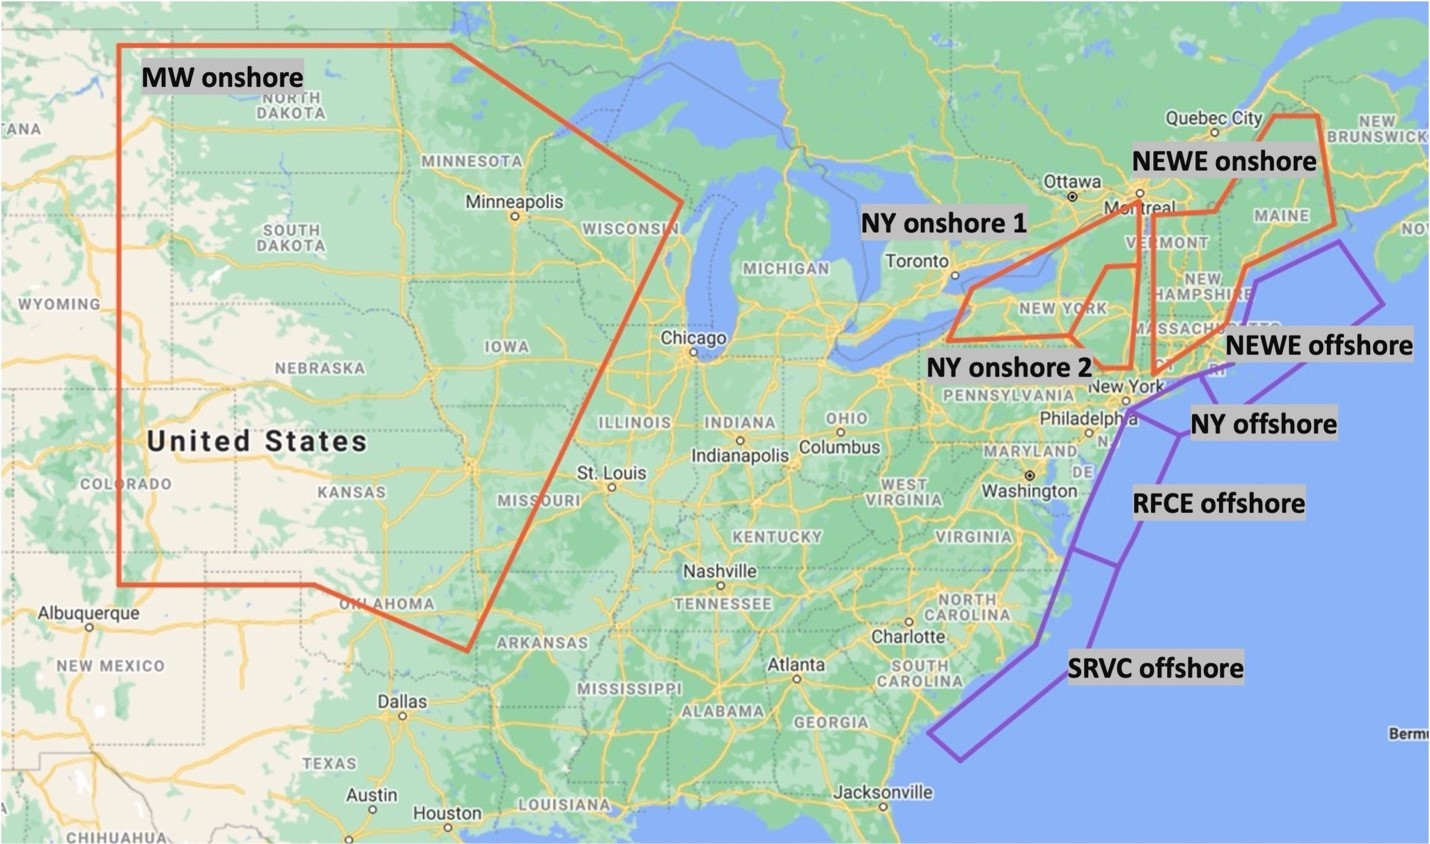

<ol>
<li> NY1 (NY_1 onshore; column B in csv file)</li>
<li> NY2 (NY_2 onshore; column C in csv file)</li>
<li> New England (NEWE onshore; column D in csv file)</li>
<li> Midwest (MW onshore; column E in csv file)</li>
<li> OSW1 (NEWE offshore; column F in csv file)</li>
<li> OSW2 (NY offshore; column G in csv file)</li>
<li> OSW3 (RFCE offshore; column H in csv file)</li>
<li> OSW4 (SRVC offshore; column I in csv file)</li>
</ol>


#### <p>Hourly capacity factor data in 2011 for each site is provided in "wind_po_hrly.csv", which is already the aggregated data from multiple locations into one location. Values are between 0 and 1 that indicating the wind power generating potential for the turbine that installed in local area. For onshore area,the rated power for each turbine is 2 MW while the offshore are 6 MW, this is coordinated with the wind resource availability since onshore generally has less wind resource potential than offshore area.</p>
<h2>1. Combination of wind turbines to achive average 10 GW output</h2>

#### <p>Firstly, averagly 10 GW output is choosen to the standarized analysis parameter for combining the wind turbines together. It is not required to have a 10 GW output every single hour, but we consider the annual output of the combination of wind turbines in each site can meet the requirement of 10GW * 8760 hours = 87600 GWh in a year.</p>


In [2]:
locations =  data.columns[1:]
turbine_power = [2,2,2,2,6,6,6,6]

In [3]:
number_of_turbines = []
for i in range(len(locations)):
    number_of_turbines.append(10000/(data[locations[i]].mean()*turbine_power[i]))
    print("Number of turbine for 10 GW for site",i+1,"is:","%.2f" % number_of_turbines[i])

Number of turbine for 10 GW for site 1 is: 16883.76
Number of turbine for 10 GW for site 2 is: 16703.97
Number of turbine for 10 GW for site 3 is: 10984.08
Number of turbine for 10 GW for site 4 is: 10931.94
Number of turbine for 10 GW for site 5 is: 3034.32
Number of turbine for 10 GW for site 6 is: 3357.26
Number of turbine for 10 GW for site 7 is: 3554.75
Number of turbine for 10 GW for site 8 is: 3460.91


<h2>2. Hour fraction in each power output range</h2>

#### <p> Combining wind turbines in individual spots can meet the assumption of generating averagly 10GW power output for each site. In the next step, calculation has been done for the fraction of hour in each power output range for site individually and the conbination sites.In order to get the fraction, data was processed as follows:</p>
<ol> 
    <li><strong>Calculate the total generation for the individual site in each hour.</strong></li>
<em>Total power generation in each hour = [individual turbine rated power] * [number of combined turbines] * [Capacity Factor]</em>
    <li><strong>Calculate the total generation for the combined wind turbines in each hour.</strong></li>
<em>Total power generation in each hour = (contribution percentage)*([individual turbine rated power] * [number of combined turbines] * [Capacity Factor])</em>
    <li><strong>Iterate through each column, count the number of hour that falls into each power range,then calculation time fraction of each power range.</strong></li>
<em>Proportion of power range = [number of hour in each power range] / [total hour] </em>
<ol>        



<h3> 2.1 Time fraction for the individual site in different power generation range</h3>

In [4]:
locations =  data.columns[1:]
hourly_energy_generation = []
for i in range(len(locations)):
    hourly_energy_generation.append(number_of_turbines[i]*data[locations[i]]*turbine_power[i])
    print(hourly_energy_generation)

[0       24489.570809
1       23704.840489
2       22629.765813
3       21177.276158
4       19614.929862
            ...     
8755     5066.660474
8756     6585.043590
8757     7887.241422
8758     8660.089898
8759     8546.537943
Name: ny_1_onshore, Length: 8760, dtype: float64]
[0       24489.570809
1       23704.840489
2       22629.765813
3       21177.276158
4       19614.929862
            ...     
8755     5066.660474
8756     6585.043590
8757     7887.241422
8758     8660.089898
8759     8546.537943
Name: ny_1_onshore, Length: 8760, dtype: float64, 0       15033.690574
1       14915.357204
2       14439.543819
3       14574.451165
4       15237.628565
            ...     
8755     2752.528795
8756     4979.565874
8757     8278.752617
8758    10296.672005
8759    12359.032296
Name: ny_2_onshore, Length: 8760, dtype: float64]
[0       24489.570809
1       23704.840489
2       22629.765813
3       21177.276158
4       19614.929862
            ...     
8755     5066.660474
8756   

In [5]:
power_generation = xr.DataArray(data = hourly_energy_generation)
power_generation

<xarray.DataArray (dim_0: 8, dim_1: 8760)>
array([[24489.570809  , 23704.84048948, 22629.76581344, ...,
         7887.24142215,  8660.0898979 ,  8546.53794343],
       [15033.69057433, 14915.35720408, 14439.5438188 , ...,
         8278.7526166 , 10296.67200508, 12359.03229621],
       [15245.82472261, 14892.51205937, 14181.91214258, ...,
         3942.59607735,  6387.38858162,  8496.94965066],
       ...,
       [10636.19673759, 10692.65392691, 10854.26334595, ...,
         7299.67174084, 10206.93371188, 13649.34847554],
       [ 7549.1509465 ,  7620.61831067,  7986.46485024, ...,
        12756.57254096, 16091.67862845, 16715.13624921],
       [ 3931.37057653,  4422.31691012,  4832.57554756, ...,
        10717.22356883, 10616.23598167,  9840.21117654]])
Dimensions without coordinates: dim_0, dim_1

In [6]:
fraction_less_two = []
# Calculate the hourly propotion for power generation less than 2GW in individual site
for i in range(len(hourly_energy_generation)):
    less_than_two = data[locations[i]]*number_of_turbines[i]*turbine_power[i] <= 2000
    count = np.count_nonzero(less_than_two)
    fraction_less_two.append("%.2f"%((count/len(data[locations[i]]))*100))
    print("%.2f"%((count/len(data[locations[i]]))*100),"%")
fraction_less_two

15.51 %
19.34 %
8.89 %
2.76 %
11.15 %
16.11 %
16.83 %
7.67 %


['15.51', '19.34', '8.89', '2.76', '11.15', '16.11', '16.83', '7.67']

In [7]:
fraction_two_to_six = [] 
# Calculate the hourly propotion for power generation 2GW - 6GW in individual site
for i in range(len(hourly_energy_generation)):
    two_to_six = (data[locations[i]]*number_of_turbines[i]*turbine_power[i] > 2000) & (data[locations[i]]*number_of_turbines[i]*turbine_power[i] <=6000)
    count_two_to_six = np.count_nonzero(two_to_six)
    fraction_two_to_six.append("%.2f"%(count_two_to_six/len(data[locations[i]])*100))
    print("%.2f"%(count_two_to_six/len(data[locations[i]])*100),"%")
fraction_two_to_six 

28.60 %
24.26 %
22.80 %
19.58 %
20.82 %
18.49 %
20.94 %
22.52 %


['28.60', '24.26', '22.80', '19.58', '20.82', '18.49', '20.94', '22.52']

In [8]:
fraction_six_to_ten = []
# Calculate the hourly propotion for power generation 6GW - 10GW in individual site
for i in range(len(hourly_energy_generation)):
    six_to_ten = (data[locations[i]]*number_of_turbines[i]*turbine_power[i] > 6000) & (data[locations[i]]*number_of_turbines[i]*turbine_power[i] <=10000)
    count_six_to_ten = np.count_nonzero(six_to_ten)
    fraction_six_to_ten.append("%.2f"%(count_six_to_ten/len(data[locations[i]])*100))
    print("%.2f"%(count_six_to_ten/len(data[locations[i]])*100),"%")
fraction_six_to_ten

17.25 %
14.82 %
19.76 %
29.09 %
15.64 %
17.25 %
15.76 %
21.37 %


['17.25', '14.82', '19.76', '29.09', '15.64', '17.25', '15.76', '21.37']

In [9]:
fraction_above10 = []
# Calculate the hourly propotion for power generation above 10GW in individual site
for i in range(len(hourly_energy_generation)):
    above_ten = (data[locations[i]]*number_of_turbines[i]*turbine_power[i] > 10000)
    above_ten = np.count_nonzero(above_ten)
    fraction_above10.append("%.2f"%( above_ten/len(data[locations[i]])*100))
    print("%.2f"%(above_ten/len(data[locations[i]])*100),"%")
fraction_above10

38.64 %
41.59 %
48.55 %
48.57 %
52.39 %
48.15 %
46.47 %
48.44 %


['38.64', '41.59', '48.55', '48.57', '52.39', '48.15', '46.47', '48.44']

<h3> 2.2 Time fraction for combined sites in different power generation range.</h3>

In [10]:
combine = pd.DataFrame()
combine["site1234"]= 0.25 * (data[locations[0]]* number_of_turbines[0]+data[locations[1]]* number_of_turbines[1]+data[locations[2]]* number_of_turbines[2]+data[locations[3]]* number_of_turbines[3])*2 
combine["site1256"]= 0.25 * ((data[locations[0]]* number_of_turbines[0]+data[locations[1]]* number_of_turbines[1])*2+(data[locations[4]]* number_of_turbines[4]+data[locations[5]]* number_of_turbines[5])*6) 
combine["site5678"]= 0.25 * (data[locations[4]]* number_of_turbines[4]+data[locations[5]]* number_of_turbines[5]+data[locations[6]]* number_of_turbines[6]+data[locations[7]]* number_of_turbines[7])*6
combine["all_sites"]= 0.125 *( ((data[locations[0]]* number_of_turbines[0]+data[locations[1]]* number_of_turbines[1]+data[locations[2]]* number_of_turbines[2]+data[locations[3]]* number_of_turbines[3])*2)
                            + ((data[locations[4]]* number_of_turbines[4]+data[locations[5]]* number_of_turbines[5]+data[locations[6]]* number_of_turbines[6]+data[locations[7]]* number_of_turbines[7])*6))
combine.head()

,site1234,site1256,site5678,all_sites
0,17225.819301,15996.496708,8985.811743,13105.815522
1,17143.626468,15820.252913,9175.937295,13159.781881
2,16735.371788,15459.305077,9396.737768,13066.054778
3,16353.090355,15127.556492,9537.293610,12945.191982
4,16120.703439,14953.064793,9695.577042,12908.140240


In [11]:
loc=  combine.columns[:]
c_less_two = [] 
#calculate the proportion of hour that wind turbines in the combined sites generate power less than 2GW
for i in range(len(loc)):
    less_two = combine[loc[i]]<=2000
    count_less_two = np.count_nonzero(less_two)
    c_less_two.append("%.2f"%(count_less_two/len(combine[loc[i]])*100))
    print("%.2f"%(count_less_two/len(combine[loc[i]])*100),"%")
c_less_two

2.56 %
6.84 %
3.65 %
0.99 %


['2.56', '6.84', '3.65', '0.99']

In [12]:
c_26 = []
#calculate the proportion of hour that wind turbines in the combined sites generate power between 2GW to 6GW
for i in range(len(loc)):
    c2_6 = (combine[loc[i]]>2000)&(combine[loc[i]]<=6000)
    count_c2_6 = np.count_nonzero(c2_6)
    c_26.append("%.2f"%(count_c2_6/len(combine[loc[i]])*100))
    print("%.2f"%(count_c2_6/len(combine[loc[i]])*100),"%")
c_26

26.85 %
26.06 %
24.69 %
24.22 %


['26.85', '26.06', '24.69', '24.22']

In [13]:
c_610 = []
#calculate the proportion of hour that wind turbines in the combined sites generate power between 6GW to 10GW
for i in range(len(loc)):
    c6_10 = (combine[loc[i]]>6000)&(combine[loc[i]]<=10000)
    count_c6_10 = np.count_nonzero(c6_10)
    c_610.append("%.2f"%(count_c6_10/len(combine[loc[i]])*100))
    print("%.2f"%(count_c6_10/len(combine[loc[i]])*100),"%")
c_610

26.37 %
22.68 %
25.39 %
29.03 %


['26.37', '22.68', '25.39', '29.03']

In [14]:
c_10 =[]
#calculate the proportion of hour that wind turbines in the combined sites generate power above 10GW
for i in range(len(loc)):
    above10 = combine[loc[i]]>10000
    count_above10 = np.count_nonzero(above10)
    c_10.append("%.2f"%(count_above10/len(combine[loc[i]])*100))
    print("%.2f"%(count_above10/len(combine[loc[i]])*100),"%")
c_10

44.22 %
44.42 %
46.27 %
45.75 %


['44.22', '44.42', '46.27', '45.75']

In [15]:
fraction_combine = pd.DataFrame({"<2GW":c_less_two,"2GW-6GW":c_26,"6GW-10GW":c_610,">10GW":c_10})
fraction_combine

,<2GW,2GW-6GW,6GW-10GW,>10GW
0,2.56,26.85,26.37,44.22
1,6.84,26.06,22.68,44.42
2,3.65,24.69,25.39,46.27
3,0.99,24.22,29.03,45.75


<h3> 2.3 Summarize individual site and combined sites in a table.</h3>

In [16]:
fraction_combine1=fraction_combine.transpose()
fraction_table = pd.DataFrame({"<2GW":fraction_less_two,"2GW-6GW":fraction_two_to_six,"6GW-10GW":fraction_six_to_ten,">10GW":fraction_above10})

fraction_table=fraction_table.rename(index={0:"site1",1:"site2",2:"site3",3:"site4",4:"site5",5:"site6",6:"site7",7:"site8"}).T
fraction_table["site1234"]= fraction_combine1.iloc[:,0]
fraction_table["site1256"]= fraction_combine1.iloc[:,1]
fraction_table["site5678"]= fraction_combine1.iloc[:,2]
fraction_table["all_sites"]= fraction_combine1.iloc[:,3]
fraction_table

,site1,site2,site3,site4,site5,site6,site7,site8,site1234,site1256,site5678,all_sites
<2GW,15.51,19.34,8.89,2.76,11.15,16.11,16.83,7.67,2.56,6.84,3.65,0.99
2GW-6GW,28.60,24.26,22.80,19.58,20.82,18.49,20.94,22.52,26.85,26.06,24.69,24.22
6GW-10GW,17.25,14.82,19.76,29.09,15.64,17.25,15.76,21.37,26.37,22.68,25.39,29.03
>10GW,38.64,41.59,48.55,48.57,52.39,48.15,46.47,48.44,44.22,44.42,46.27,45.75


<h3>Annually Power Generation in each site and combination 

In [17]:
power_generation = pd.DataFrame(data = hourly_energy_generation).T
power_generation["site1234"]= combine.iloc[:,0]
power_generation["site1256"]= combine.iloc[:,1]
power_generation["site5678"]= combine.iloc[:,2]
power_generation["all_sites"]= combine.iloc[:,3]
power_generation["time"]=pd.to_datetime(data['date.time'])
df=power_generation.set_index('time')
df.head()

,ny_1_onshore,ny_2_onshore,newe_onshore,mw_onshore,newe_offshore,ny_offshore,rfce_offshore,srvc_offshore,site1234,site1256,site5678,all_sites
time,,,,,,,,,,,,
2011-01-01 00:00:00,24489.570809,15033.690574,15245.824723,14134.191098,13826.528713,10636.196738,7549.150947,3931.370577,17225.819301,15996.496708,8985.811743,13105.815522
2011-01-01 01:00:00,23704.840489,14915.357204,14892.512059,15061.796117,13968.160031,10692.653927,7620.618311,4422.316910,17143.626468,15820.252913,9175.937295,13159.781881
2011-01-01 02:00:00,22629.765813,14439.543819,14181.912143,15690.265379,13913.647328,10854.263346,7986.464850,4832.575548,16735.371788,15459.305077,9396.737768,13066.054778
2011-01-01 03:00:00,21177.276158,14574.451165,13357.018891,16303.615205,13841.208946,10917.289701,8268.425492,5122.250302,16353.090355,15127.556492,9537.293610,12945.191982
2011-01-01 04:00:00,19614.929862,15237.628565,12845.393369,16784.861958,13833.131189,11126.569557,8399.914225,5422.693199,16120.703439,14953.064793,9695.577042,12908.140240


In [18]:
ds = df.to_xarray()
ds

<xarray.Dataset>
Dimensions:        (time: 8760)
Coordinates:
  * time           (time) datetime64[ns] 2011-01-01 ... 2011-12-31T23:00:00
Data variables:
    ny_1_onshore   (time) float64 2.449e+04 2.37e+04 ... 8.66e+03 8.547e+03
    ny_2_onshore   (time) float64 1.503e+04 1.492e+04 ... 1.03e+04 1.236e+04
    newe_onshore   (time) float64 1.525e+04 1.489e+04 ... 6.387e+03 8.497e+03
    mw_onshore     (time) float64 1.413e+04 1.506e+04 ... 1.798e+04 1.924e+04
    newe_offshore  (time) float64 1.383e+04 1.397e+04 ... 5.725e+03 8.537e+03
    ny_offshore    (time) float64 1.064e+04 1.069e+04 ... 1.021e+04 1.365e+04
    rfce_offshore  (time) float64 7.549e+03 7.621e+03 ... 1.609e+04 1.672e+04
    srvc_offshore  (time) float64 3.931e+03 4.422e+03 ... 1.062e+04 9.84e+03
    site1234       (time) float64 1.723e+04 1.714e+04 ... 1.083e+04 1.216e+04
    site1256       (time) float64 1.6e+04 1.582e+04 ... 8.722e+03 1.077e+04
    site5678       (time) float64 8.986e+03 9.176e+03 ... 1.066e+04 1.219e+04
    all_sites      (time) float64 1.311e+04 1.316e+04 ... 1.075e+04 1.217e+04

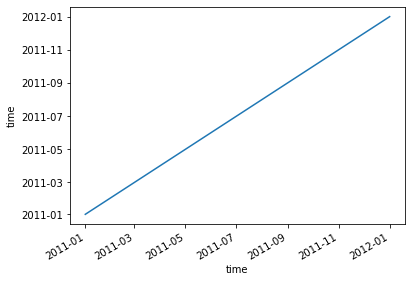

In [19]:
ds.time.plot()

In [20]:
djf = ds.isel(time=ds.time.dt.month.isin([12,1,2]))
mam = ds.isel(time=ds.time.dt.month.isin([3,4,5]))
jja = ds.isel(time=ds.time.dt.month.isin([6,7,8]))
son = ds.isel(time=ds.time.dt.month.isin([9,10,11]))

In [21]:
djf.mean('time')/(djf.mean()+mam.mean()+jja.mean()+son.mean())

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   float64 0.2946
    ny_2_onshore   float64 0.2935
    newe_onshore   float64 0.2812
    mw_onshore     float64 0.267
    newe_offshore  float64 0.2752
    ny_offshore    float64 0.2743
    rfce_offshore  float64 0.2864
    srvc_offshore  float64 0.2861
    site1234       float64 0.2841
    site1256       float64 0.2844
    site5678       float64 0.2805
    all_sites      float64 0.2823

In [22]:
mam.mean('time')/(djf.mean()+mam.mean()+jja.mean()+son.mean())

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   float64 0.2855
    ny_2_onshore   float64 0.3149
    newe_onshore   float64 0.2862
    mw_onshore     float64 0.2709
    newe_offshore  float64 0.2863
    ny_offshore    float64 0.2917
    rfce_offshore  float64 0.306
    srvc_offshore  float64 0.2767
    site1234       float64 0.2894
    site1256       float64 0.2946
    site5678       float64 0.2902
    all_sites      float64 0.2898

In [23]:
jja.mean('time')/(djf.mean()+mam.mean()+jja.mean()+son.mean())

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   float64 0.1549
    ny_2_onshore   float64 0.1575
    newe_onshore   float64 0.1815
    mw_onshore     float64 0.2045
    newe_offshore  float64 0.189
    ny_offshore    float64 0.1847
    rfce_offshore  float64 0.1657
    srvc_offshore  float64 0.1936
    site1234       float64 0.1746
    site1256       float64 0.1715
    site5678       float64 0.1833
    all_sites      float64 0.1789

In [24]:
son.mean('time')/(djf.mean()+mam.mean()+jja.mean()+son.mean())

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   float64 0.2651
    ny_2_onshore   float64 0.234
    newe_onshore   float64 0.2512
    mw_onshore     float64 0.2575
    newe_offshore  float64 0.2495
    ny_offshore    float64 0.2492
    rfce_offshore  float64 0.2419
    srvc_offshore  float64 0.2436
    site1234       float64 0.252
    site1256       float64 0.2494
    site5678       float64 0.2461
    all_sites      float64 0.249

In [25]:
data['time'] = pd.to_datetime(data['date.time'])
df_cf = data.set_index('time')
del df_cf['date.time']
ds_cf = df_cf.to_xarray()

ds_cf.mean()
ds_cf.mean()
ds_cf['site1234']= 0.25*(ds_cf.ny_1_onshore+ds_cf.ny_2_onshore+ds_cf.newe_onshore+ds_cf.mw_onshore)
ds_cf['site1256']= 0.25*(ds_cf.ny_1_onshore+ds_cf.ny_2_onshore+ds_cf.newe_offshore+ds_cf.ny_offshore)
ds_cf['site5678']= 0.25*(ds_cf.newe_offshore+ds_cf.ny_offshore+ds_cf.rfce_offshore+ds_cf.srvc_offshore)
ds_cf['all_sites']= 0.125*(ds_cf.ny_1_onshore+ds_cf.ny_2_onshore+ds_cf.newe_onshore+ds_cf.mw_onshore+ds_cf.newe_offshore+ds_cf.ny_offshore+ds_cf.rfce_offshore+ds_cf.srvc_offshore)
ds_cf

<xarray.Dataset>
Dimensions:        (time: 8760)
Coordinates:
  * time           (time) datetime64[ns] 2011-01-01 ... 2011-12-31T23:00:00
Data variables:
    ny_1_onshore   (time) float64 0.7252 0.702 0.6702 ... 0.2336 0.2565 0.2531
    ny_2_onshore   (time) float64 0.45 0.4465 0.4322 ... 0.2478 0.3082 0.3699
    newe_onshore   (time) float64 0.694 0.6779 0.6456 ... 0.1795 0.2908 0.3868
    mw_onshore     (time) float64 0.6465 0.6889 0.7176 ... 0.7623 0.8226 0.8802
    newe_offshore  (time) float64 0.7595 0.7672 0.7642 ... 0.3237 0.3145 0.4689
    ny_offshore    (time) float64 0.528 0.5308 0.5388 ... 0.3624 0.5067 0.6776
    rfce_offshore  (time) float64 0.3539 0.3573 0.3744 ... 0.5981 0.7545 0.7837
    srvc_offshore  (time) float64 0.1893 0.213 0.2327 ... 0.5161 0.5112 0.4739
    site1234       (time) float64 0.6289 0.6288 0.6164 ... 0.3558 0.4195 0.4725
    site1256       (time) float64 0.6157 0.6116 0.6014 ... 0.2919 0.3465 0.4424
    site5678       (time) float64 0.4577 0.4671 0.4776 ... 0.4501 0.5217 0.601
    all_sites      (time) float64 0.5433 0.5479 0.547 ... 0.4029 0.4706 0.5368

In [26]:
ds_cf.mean()

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   float64 0.2961
    ny_2_onshore   float64 0.2993
    newe_onshore   float64 0.4552
    mw_onshore     float64 0.4574
    newe_offshore  float64 0.5493
    ny_offshore    float64 0.4964
    rfce_offshore  float64 0.4689
    srvc_offshore  float64 0.4816
    site1234       float64 0.377
    site1256       float64 0.4103
    site5678       float64 0.499
    all_sites      float64 0.438

In [27]:
pm11_am5 = ds.isel(time=ds.time.dt.hour.isin([23,0,1,2,3,4]))
am5_am11 = ds.isel(time=ds.time.dt.hour.isin([5,6,7,8,9,10]))
am11_pm5 = ds.isel(time=ds.time.dt.hour.isin([11,12,13,14,15,16]))
pm5_pm11 = ds.isel(time=ds.time.dt.hour.isin([17,18,19,20,21,22]))

In [28]:
pm11_am5.mean('time')/(pm11_am5.mean()+am5_am11.mean()+am11_pm5.mean()+pm5_pm11.mean())

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   float64 0.2859
    ny_2_onshore   float64 0.2901
    newe_onshore   float64 0.2776
    mw_onshore     float64 0.2792
    newe_offshore  float64 0.2635
    ny_offshore    float64 0.279
    rfce_offshore  float64 0.2714
    srvc_offshore  float64 0.2671
    site1234       float64 0.2832
    site1256       float64 0.2796
    site5678       float64 0.2703
    all_sites      float64 0.2767

In [29]:
am5_am11.mean('time')/(pm11_am5.mean()+am5_am11.mean()+am11_pm5.mean()+pm5_pm11.mean())

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   float64 0.2748
    ny_2_onshore   float64 0.2638
    newe_onshore   float64 0.2541
    mw_onshore     float64 0.2996
    newe_offshore  float64 0.2472
    ny_offshore    float64 0.253
    rfce_offshore  float64 0.2566
    srvc_offshore  float64 0.2591
    site1234       float64 0.2731
    site1256       float64 0.2597
    site5678       float64 0.254
    all_sites      float64 0.2635

In [30]:
am5_am11.mean('time')/(pm11_am5.mean()+am5_am11.mean()+am11_pm5.mean()+pm5_pm11.mean())

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   float64 0.2748
    ny_2_onshore   float64 0.2638
    newe_onshore   float64 0.2541
    mw_onshore     float64 0.2996
    newe_offshore  float64 0.2472
    ny_offshore    float64 0.253
    rfce_offshore  float64 0.2566
    srvc_offshore  float64 0.2591
    site1234       float64 0.2731
    site1256       float64 0.2597
    site5678       float64 0.254
    all_sites      float64 0.2635

In [31]:
am11_pm5.mean('time')/(pm11_am5.mean()+am5_am11.mean()+am11_pm5.mean()+pm5_pm11.mean())

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   float64 0.2171
    ny_2_onshore   float64 0.2125
    newe_onshore   float64 0.2213
    mw_onshore     float64 0.2293
    newe_offshore  float64 0.2362
    ny_offshore    float64 0.2214
    rfce_offshore  float64 0.2264
    srvc_offshore  float64 0.2309
    site1234       float64 0.2201
    site1256       float64 0.2218
    site5678       float64 0.2287
    all_sites      float64 0.2244

In [32]:
pm5_pm11.mean('time')/(pm11_am5.mean()+am5_am11.mean()+am11_pm5.mean()+pm5_pm11.mean())

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   float64 0.2221
    ny_2_onshore   float64 0.2336
    newe_onshore   float64 0.2471
    mw_onshore     float64 0.1919
    newe_offshore  float64 0.2531
    ny_offshore    float64 0.2467
    rfce_offshore  float64 0.2456
    srvc_offshore  float64 0.2428
    site1234       float64 0.2237
    site1256       float64 0.2389
    site5678       float64 0.247
    all_sites      float64 0.2354

In [33]:
(djf<2000).sum()

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   int64 282
    ny_2_onshore   int64 314
    newe_onshore   int64 150
    mw_onshore     int64 9
    newe_offshore  int64 219
    ny_offshore    int64 320
    rfce_offshore  int64 317
    srvc_offshore  int64 133
    site1234       int64 13
    site1256       int64 92
    site5678       int64 62
    all_sites      int64 4

In [34]:
(mam<2000).sum()

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   int64 302
    ny_2_onshore   int64 311
    newe_onshore   int64 152
    mw_onshore     int64 13
    newe_offshore  int64 190
    ny_offshore    int64 248
    rfce_offshore  int64 169
    srvc_offshore  int64 74
    site1234       int64 12
    site1256       int64 111
    site5678       int64 38
    all_sites      int64 5

In [35]:
(jja<2000).sum()

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   int64 510
    ny_2_onshore   int64 633
    newe_onshore   int64 291
    mw_onshore     int64 110
    newe_offshore  int64 322
    ny_offshore    int64 470
    rfce_offshore  int64 486
    srvc_offshore  int64 245
    site1234       int64 144
    site1256       int64 278
    site5678       int64 112
    all_sites      int64 55

In [36]:
(son<2000).sum()

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   int64 265
    ny_2_onshore   int64 436
    newe_onshore   int64 186
    mw_onshore     int64 110
    newe_offshore  int64 246
    ny_offshore    int64 373
    rfce_offshore  int64 502
    srvc_offshore  int64 220
    site1234       int64 55
    site1256       int64 118
    site5678       int64 108
    all_sites      int64 23

In [44]:
t1 = (pm11_am5<2000).sum()
t1

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   int64 208
    ny_2_onshore   int64 267
    newe_onshore   int64 93
    mw_onshore     int64 13
    newe_offshore  int64 211
    ny_offshore    int64 241
    rfce_offshore  int64 302
    srvc_offshore  int64 134
    site1234       int64 3
    site1256       int64 66
    site5678       int64 54
    all_sites      int64 0

In [46]:
t2 = (am5_am11<2000).sum()
t2

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   int64 225
    ny_2_onshore   int64 365
    newe_onshore   int64 159
    mw_onshore     int64 0
    newe_offshore  int64 242
    ny_offshore    int64 358
    rfce_offshore  int64 348
    srvc_offshore  int64 169
    site1234       int64 5
    site1256       int64 113
    site5678       int64 82
    all_sites      int64 0

In [47]:
t3 = (am11_pm5<2000).sum()
t3

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   int64 495
    ny_2_onshore   int64 574
    newe_onshore   int64 303
    mw_onshore     int64 85
    newe_offshore  int64 289
    ny_offshore    int64 474
    rfce_offshore  int64 442
    srvc_offshore  int64 197
    site1234       int64 111
    site1256       int64 258
    site5678       int64 136
    all_sites      int64 61

In [48]:
t4 = (pm5_pm11<2000).sum()
t4

<xarray.Dataset>
Dimensions:        ()
Data variables:
    ny_1_onshore   int64 431
    ny_2_onshore   int64 488
    newe_onshore   int64 224
    mw_onshore     int64 144
    newe_offshore  int64 235
    ny_offshore    int64 338
    rfce_offshore  int64 382
    srvc_offshore  int64 172
    site1234       int64 105
    site1256       int64 162
    site5678       int64 48
    all_sites      int64 26

In [ ]:
time_fraction = xr.Dataset(
    data_vars = {'t1':([